# Includes and set-up

In [34]:
## Setup code for the notebook
%matplotlib notebook
# %matplotlib inline

%load_ext autoreload
%autoreload 2

# These are all the includes used through the notebook
import numpy as np

# Tools for image processing
from numpy.fft import fft2, ifft2, fftshift

import matplotlib.pyplot as plt
from ipytools import display_image   # display image in the notebook
from ipytools import display_imshow  # display image(arrays) in notebook
from ipytools import display_table   # display tables in the notebook
from ipytools import display_gallery # display many images
from skimage.io import imread        # load images, even pgm or url
from glob import glob

from img_tools import per_smooth_decomposition 
from skimage.measure import compare_mse

# Pandas for table manipulation
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## GLOBALS

In [2]:
IMAGE_PATH = "../../images/"

In [12]:
im = {}
for path in glob(IMAGE_PATH + "*"):
    im[path.split("/")[-1].split(".")[0]] = imread(path).astype(float)
#     per_smooth_decomposition(imread(path).astype(float))

<IPython.core.display.Javascript object>


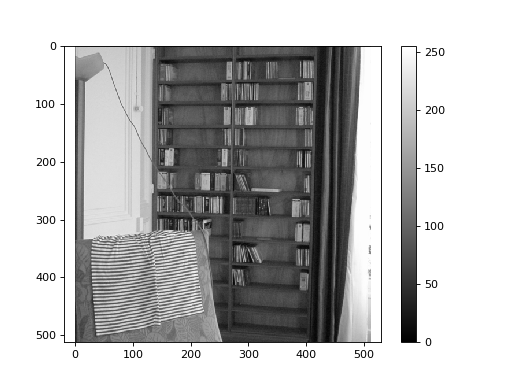

In [18]:
display_imshow(im["room"], [0, 255])

In [27]:
p, s = per_smooth_decomposition(im["lena"])

# Fourier pipeline

<IPython.core.display.Javascript object>


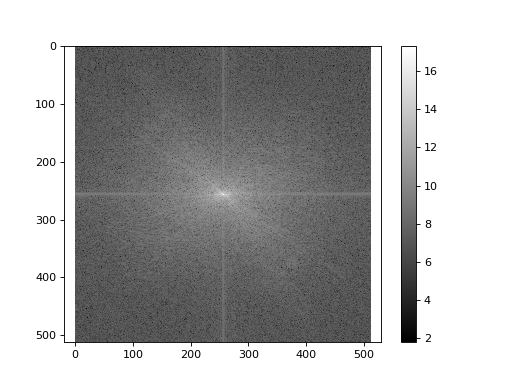

In [8]:
lena_fft = fft2(im["lena"])
display_imshow(np.log(1 + np.abs(fftshift(lena_fft))))

<IPython.core.display.Javascript object>


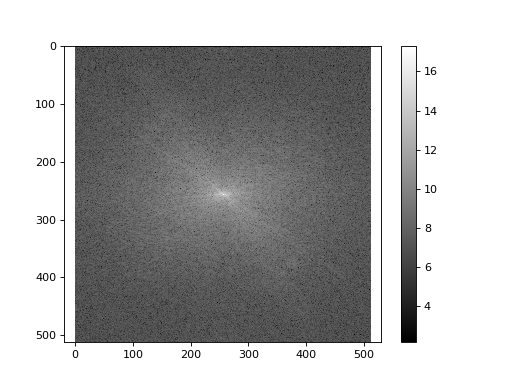

In [32]:
p_lena_fft = fft2(p)
display_imshow(np.log(1 + np.abs(fftshift(p_lena_fft))))

<IPython.core.display.Javascript object>


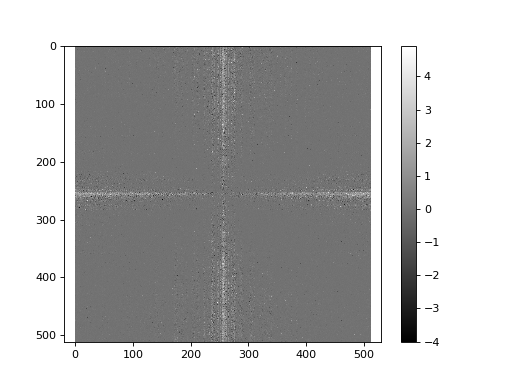

In [33]:
display_imshow(np.log(1 + np.abs(fftshift(lena_fft))) - np.log(1 + np.abs(fftshift(p_lena_fft))))

In [38]:
compare_mse(im["lena"], p)

303.78526012133756

# Zero-padding